# Notebook Gruppe 5
## Bibliotheken importieren

In [1]:
%matplotlib notebook
import generator
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from ipywidgets import *

## Trainingsdaten initialisieren

In [2]:
dimension_count = 2
sensor_count = 3
sensors = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0]])
targets = generator.generate_targets(60000, 2)
distances = generator.shitty_apply_sensors_on_targets(targets, sensors)


## Model kompilieren

In [3]:
model = keras.Sequential([
        keras.layers.Dense(20 * sensor_count, activation=tf.nn.relu, input_shape=(sensor_count,)),
        keras.layers.Dense(20 * sensor_count, activation=tf.nn.softmax),
        keras.layers.Dense(dimension_count)
    ])
model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae", "mse"]
)

## Model trainieren

In [4]:
model.fit(distances, targets, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0191 - mean_absolute_error: 0.0650 - mean_squared_error: 0.0191
Epoch 2/10
60000/60000 [==============================] - 2s 32us/step - loss: 1.0796e-04 - mean_absolute_error: 0.0078 - mean_squared_error: 1.0796e-04
Epoch 3/10
60000/60000 [==============================] - 2s 33us/step - loss: 3.6637e-05 - mean_absolute_error: 0.0048 - mean_squared_error: 3.6637e-05
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 2.6299e-05 - mean_absolute_error: 0.0041 - mean_squared_error: 2.6299e-05
Epoch 5/10
60000/60000 [==============================] - 2s 33us/step - loss: 1.9669e-05 - mean_absolute_error: 0.0035 - mean_squared_error: 1.9669e-05
Epoch 6/10
60000/60000 [==============================] - 2s 33us/step - loss: 1.6219e-05 - mean_absolute_error: 0.0031 - mean_squared_error: 1.6219e-05
Epoch 7/10
60000/60000 [==============================] - 2s 33us/step - loss: 1.4011e-05 

## Visualisierung
### Vorhergesagte Position vs tatsächliche Position
- Grüne Dreiecke ≙ Sensoren
- Blauer Kreis ≙ tatsächliche Position
    - Lässt sich festlegen durch Klicken des Diagramms
- Rotes Kreuz ≙ vorhergesagte Position

<IPython.core.display.Javascript object>


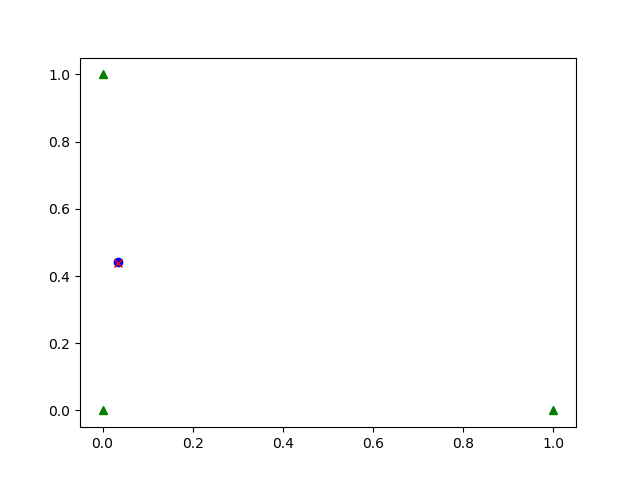

6

In [7]:
initial_target = np.array([0.5, 0.5])
initial_distance = generator.calculate_shitty_distances(initial_target, sensors)
initial_prediction = model.predict(np.array([initial_distance]))[0]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(sensors[:, 0], sensors[:, 1], "g^")
target_plot, = ax.plot(initial_target[0], initial_target[1], "bo")
prediction_plot, = ax.plot(initial_prediction[0], initial_prediction[1], "rx")


def update(x, y):
    target = np.array([x, y])
    distance = generator.calculate_shitty_distances(target, sensors)
    prediction = model.predict(np.array([distance]))[0]
    
    target_plot.set_xdata(target[0])
    target_plot.set_ydata(target[1])
    prediction_plot.set_xdata(prediction[0])
    prediction_plot.set_ydata(prediction[1])
    fig.canvas.draw()
    
    
def onclick(event):
    x, y = event.xdata, event.ydata
    if x >= 0.0 and x <= 1.0 and y >= 0.0 and y <= 1.0:
        update(event.xdata, event.ydata)

fig.canvas.mpl_connect('button_press_event', onclick)
